In [1]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from paperlib import pedshtf as pedshtf
#
plt.style.use('helvet2')

#### Read the data

In [2]:
p1 = pedshtf(shotnr=30554, exper='guimas', edition=7, nr_diags=4, elm_exper='guimas')
p2 = pedshtf(shotnr=30554, exper='guimas', edition=8, nr_diags=4, elm_exper='guimas')
p3 = pedshtf(shotnr=30554, exper='guimas', edition=9, nr_diags=4, elm_exper='guimas')
pall = [p1, p2, p3]

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [4]:
print(p1.t1,p1.t2)
print(p2.t1,p2.t2)
print(p3.t1,p3.t2)

(array([2.4], dtype=float32), array([2.6], dtype=float32))
(array([3.2], dtype=float32), array([3.5], dtype=float32))
(array([4.4], dtype=float32), array([4.7], dtype=float32))


#### Shifts

In [3]:
print(p1.neRshift)
print(p2.neRshift)
print(p3.neRshift)

[ 0.     0.     0.     0.007 -0.001  0.001  0.011  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.008 -0.004  0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.008 -0.001  0.025  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]


#### Plots

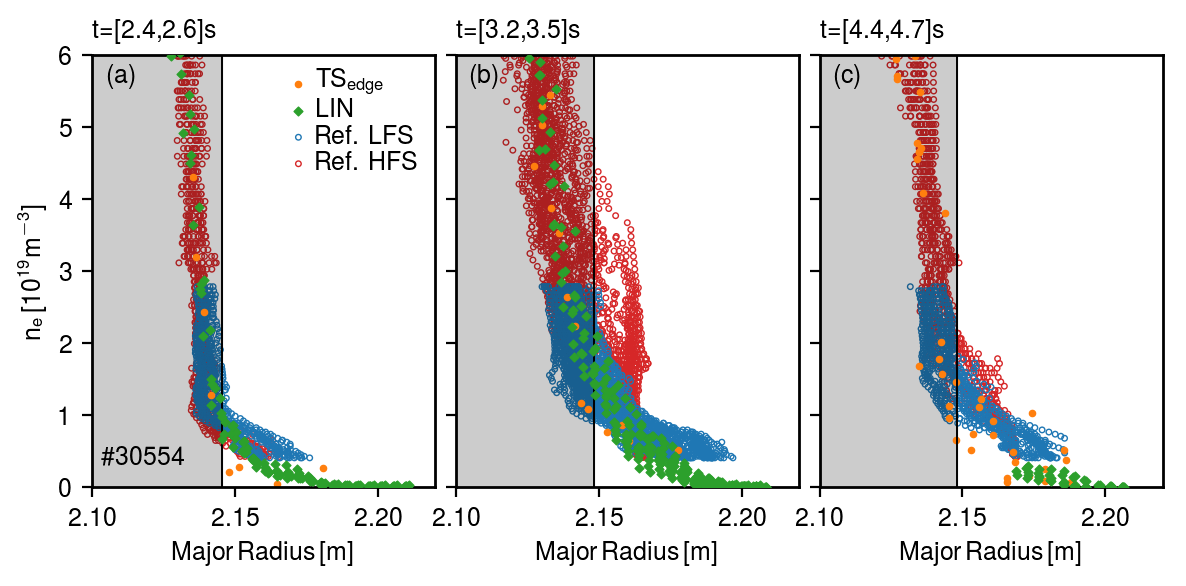

In [8]:
dotsize = 5
dotsizeref = 4
zorder = np.array([3,2,1,0])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
framebox = [False, True, False]

cutsl_low = [2.135, 2.13, 2.13]
cutsl_hi = [3.0, 3.0, 2.188]
cutsh_low = [2.129, 2.14, 0.0]
textlabels= ['(a)','(b)','(c)']
fpgshift = [-0.003,0.0,0.0]

#HFS shifts
### Shifts adjusted for the first time first time
refhfsshift = np.array([0, -1.1, 2.5-1.1])*1e-2
#refhfsshift = np.array([0.011+0.001, 0.00, 0.025+0.001])
#refhfsshift = np.array([p1.neRshift[6]+0.001,p2.neRshift[6],p3.neRshift[6]-0.001])

### Shifts adjusted so (b) matches high gradient
refhfsshift = np.array([0.0, -0.025, -0.001])

#LFS shifts
#Original shifts compensated
reflfsshift = np.array([p1.neRshift[5],p2.neRshift[5],p3.neRshift[5]])

fig, ax = plt.subplots(figsize=(6,3),ncols=3,nrows=1,sharey=True,dpi=200)

for i in range(3):

    #TS edge
    ax[i].scatter(pall[i].rad[pall[i].indi[0]:pall[i].indf[0]], pall[i].dens[pall[i].indi[0]:pall[i].indf[0]]*1e-19,
                  s=dotsize, zorder=2, label=labels[0],facecolors="C1", marker='o')
    #LIN
    ax[i].scatter(pall[i].rad[pall[i].indi[1]:pall[i].indf[1]], pall[i].dens[pall[i].indi[1]:pall[i].indf[1]]*1e-19,
                  s=dotsize, zorder=3, label=labels[1],facecolors='C2', marker='D')
    #Clean up LFS ref
    lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
    ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]
    lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
    ax[i].scatter(lrad[lms]+reflfsshift[i], ldens[lms]*1e-19, s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')
    #Clean up HFS ref
    hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
    hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]
    hms = hrad>cutsh_low[i]
    ax[i].scatter(hrad[hms]+refhfsshift[i], hdens[hms]*1e-19, s=dotsizeref, zorder=0, label=labels[3],facecolors='none', edgecolors="C3", marker='o')

    #Separatrixes
    ax[i].axvline(pall[0].fpgavg+fpgshift[i], color='k', lw=0.7)
    ax[i].axvspan(2.1, pall[0].fpgavg+fpgshift[i], color='k', alpha=0.2)

    ax[i].set_xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
    
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(2.10,2.22)

    ax[i].set_title('t=[%0.1f,%0.1f]s'%(pall[i].t1,pall[i].t2), loc='left', fontsize=9)

    ax[i].set_xticks([2.10,2.15,2.20])
    ax[i].text(2.105,5.6,textlabels[i], color='k')

    #ax[i].legend(loc='upper right',borderpad=0.1,frameon=framebox[i],handletextpad=-0.3,labelspacing=0.1)

ax[0].legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=-0.3,labelspacing=0.1)
ax[0].set_ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
ax[0].text(2.103, 0.3,'\#30554',color='k')
#
plt.tight_layout()
plt.subplots_adjust(wspace=0.06)
#plt.savefig('Profiles/All_30554.png',dpi=300)
plt.savefig('Profiles/All_badjust_30554.png',dpi=300)
plt.show()